# Imports

In [3]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
import arviz as az

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
az.style.use('arviz-darkgrid')

# Flip a biased coin, and generate data with a Bernoulli distribution

In [6]:
p = 0.35

In [7]:
data = stats.bernoulli(p).rvs(10_000)
data

array([1, 1, 0, ..., 1, 0, 1])

# Create a Beta distribution with parameters, alpha and beta

In [8]:
α, β = 0.1, 0.1

In [9]:
stats.beta(α, β).pdf(np.linspace(-1,2))

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.93702038, 0.43589681, 0.30428297,
       0.2446276 , 0.21202527, 0.19298568, 0.18217086, 0.17722829,
       0.17722829, 0.18217086, 0.19298568, 0.21202527, 0.2446276 ,
       0.30428297, 0.43589681, 0.93702038, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

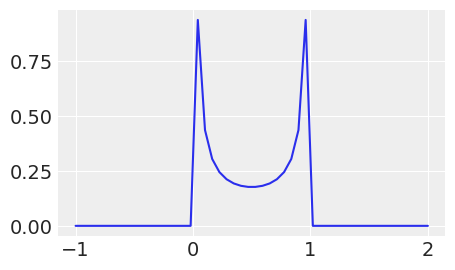

In [10]:
plt.figure(figsize=(5,3))
plt.plot(np.linspace(-1, 2), stats.beta(α, β).pdf(np.linspace(-1,2)));

# Create a stochastic model

- Beta distribution (prior)
- Bernoulli distribution (likelihood)

In [11]:
with pm.Model() as m:
    θ = pm.Beta('θ', alpha=α, beta=β)
    y = pm.Bernoulli('y', p=θ, observed=data)
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [θ]
Sampling 2 chains: 100%|██████████| 3000/3000 [00:01<00:00, 2285.20draws/s]
The acceptance probability does not match the target. It is 0.8867216793665192, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.899873658715207, but should be close to 0.8. Try to increase the number of tuning steps.


# Analyze the model

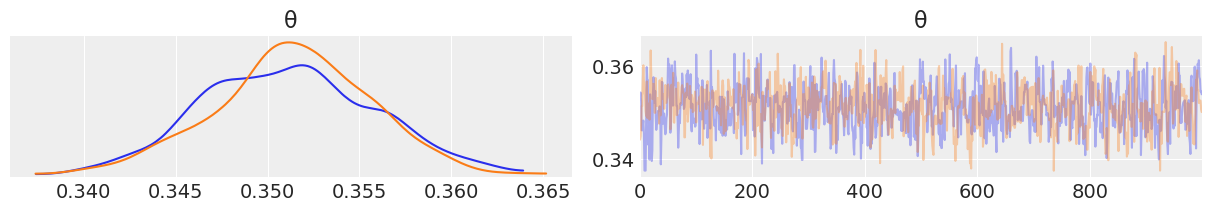

In [15]:
az.plot_trace(trace);

In [16]:
az.summary(trace)

,mean,sd,mc error,hpd 3%,hpd 97%,ess,r_hat
θ,0.35,0.0,0.0,0.34,0.36,787.0,1.01


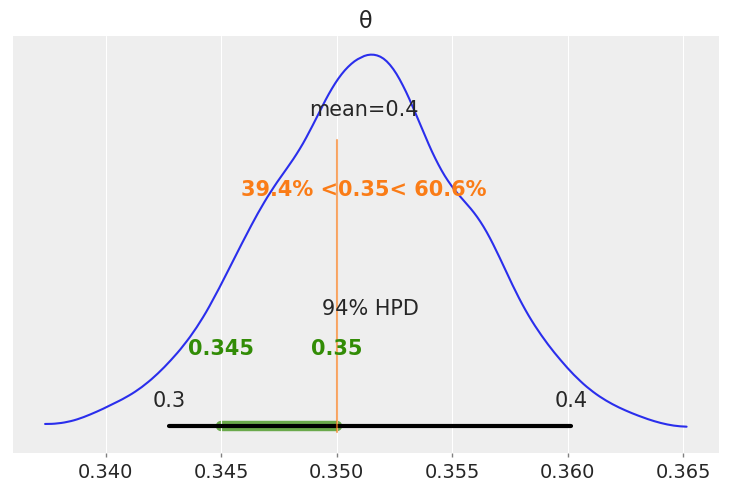

In [17]:
az.plot_posterior(trace, ref_val=0.35, rope=[0.345, .35]);